# **Import & Load CSV**

In [21]:
import pandas as pd
import re
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("sample_tweets.csv")

In [13]:
df.head()

,created_at,text
0,2025-06-20 10:15:00,I love the new features of the iPhone 15! Grea...
1,2025-06-20 11:30:00,Battery life on this phone is terrible... #iPh...
2,2025-06-21 09:45:00,Can't wait to try the new camera on iPhone 15 😍📱
3,2025-06-21 13:20:00,Disappointed with the pricing of iPhone 15. To...
4,2025-06-22 15:00:00,Absolutely amazing design and performance! #iP...


# **Clean Tweets**

In [14]:
basic_stopwords = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'you', 'your', 'yours', 'he', 'him',
    'his', 'she', 'her', 'hers', 'it', 'its', 'they', 'them', 'their', 'the',
    'is', 'are', 'was', 'were', 'be', 'been', 'have', 'has', 'do', 'does',
    'did', 'a', 'an', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 'into',
    'through', 'to', 'from', 'in', 'out', 'on', 'off', 'over', 'under',
    'again', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
    'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
    'than', 'too', 'very', 'can', 'will', 'just'
}


In [15]:
def basic_clean_text(text):
    text = re.sub(r"http\\S+|www\\S+|@\\w+|#\\w+|[^A-Za-z\\s]", "", text)
    text = text.lower()
    tokens = text.split()
    filtered = [word for word in tokens if word not in basic_stopwords]
    return " ".join(filtered)

df['clean_text'] = df['text'].apply(basic_clean_text)
df[['text', 'clean_text']].head()

,text,clean_text
0,I love the new features of the iPhone 15! Grea...,ilovethenewfeaturesoftheiphonegreatjobappleiphone
1,Battery life on this phone is terrible... #iPh...,batterylifeonthisphoneisterribleiphone
2,Can't wait to try the new camera on iPhone 15 😍📱,cantwaittotrythenewcameraoniphone
3,Disappointed with the pricing of iPhone 15. To...,disappointedwiththepricingofiphonetooexpensive...
4,Absolutely amazing design and performance! #iP...,absolutelyamazingdesignandperformanceiphone


# **Sentiment Analysis**


In [19]:
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/1e/d6/40aa5aead775582ea0cf35870e5a3f16fab4b967f1ad2debe675f673f923/textblob-0.19.0-py3-none-any.whl.metadata
  Obtaining dependency information for nltk>=3.9 from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ----------------------- ---------------- 368.6/624.3 kB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 7.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 11.1 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.5 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 9.6 MB/s eta 0

In [20]:
from textblob import TextBlob

def get_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['clean_text'].apply(get_sentiment)
df[['clean_text', 'sentiment']].head()


,clean_text,sentiment
0,ilovethenewfeaturesoftheiphonegreatjobappleiphone,Neutral
1,batterylifeonthisphoneisterribleiphone,Neutral
2,cantwaittotrythenewcameraoniphone,Neutral
3,disappointedwiththepricingofiphonetooexpensive...,Neutral
4,absolutelyamazingdesignandperformanceiphone,Neutral


# **Piechart**

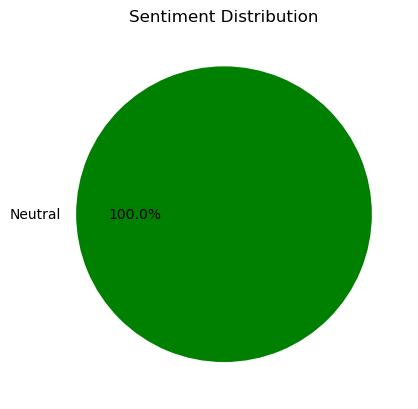

In [22]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()


# **Time Trend**

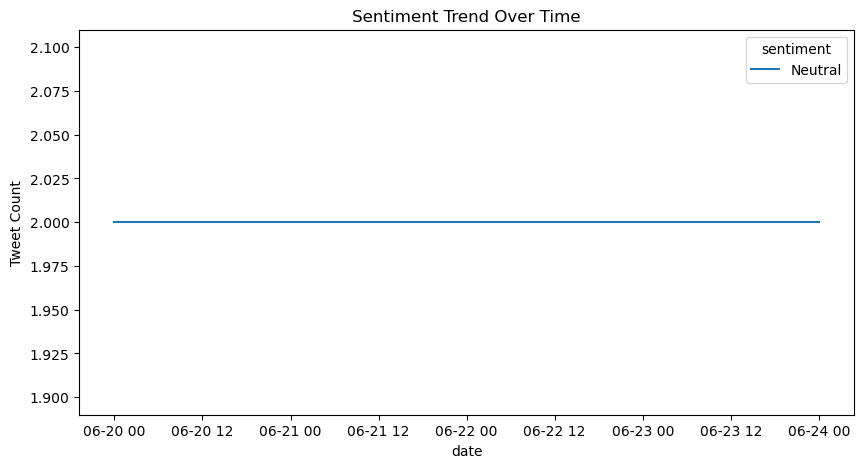

In [23]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date

sentiment_trend = df.groupby(['date', 'sentiment']).size().unstack().fillna(0)
sentiment_trend.plot(figsize=(10,5))
plt.title("Sentiment Trend Over Time")
plt.ylabel("Tweet Count")
plt.show()


# **WordCloud**

In [25]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/299.9 kB 165.2 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 365.7 kB/s eta 0:00:01
   ---------------------------------------  297.0/299.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.4 MB/s eta 0:00:00


In [28]:
df[df['sentiment'] == 'Positive']

,created_at,text,clean_text,sentiment,date


In [30]:
neutral_words = " ".join(df[df['sentiment'] == 'Neutral']['clean_text'])


In [31]:
print(df['sentiment'].value_counts())


Neutral    10
Name: sentiment, dtype: int64


## WordCloud code with a smart fallback

⚠️ No positive tweets found. Using all tweets instead for WordCloud.


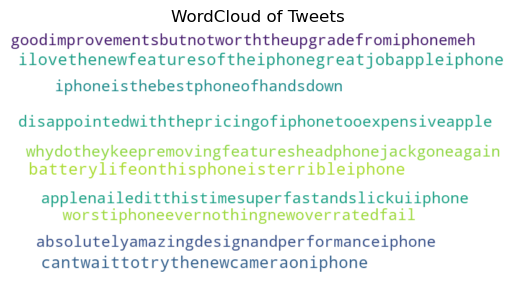

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Try to use only Positive tweets
positive_words = " ".join(df[df['sentiment'] == 'Positive']['clean_text'])

# Fallback: if no positive tweets, use all tweets
if not positive_words.strip():
    print("⚠️ No positive tweets found. Using all tweets instead for WordCloud.")
    positive_words = " ".join(df['clean_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

# Display it
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Tweets")
plt.show()
